In [34]:
import pandas

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25' 
plt.rcParams['xtick.labelsize'] = '14'
plt.rcParams['ytick.labelsize'] = '14'

%matplotlib notebook

In [35]:
# Replace this variable accordingly 
path_to_results = "../experiments/2018-02-17-23-37_PowerN_/"

In [36]:
data = pandas.read_csv(path_to_results + "PowerN.csv", header=0)
data["category"] = [x.split("-")[1] for x in data["refId"]]

In [37]:
data['n'].unique()

array([ 100,  200,  500, 1000, 2000])

In [38]:
data["testId"].unique()

array(['KS', 'MWP', 'MWPr', 'UDS', 'CMI', 'HiCS', 'II', 'TC', 'MS', 'MAC'], dtype=object)

In [39]:
data["nDim"].unique()

array([2, 3, 5])

In [40]:
data["M"].unique()

array([ nan])

In [41]:
data["n"].unique()

array([ 100,  200,  500, 1000, 2000])

In [42]:
data["refId"].unique()

array(['0-Hypothesis', 'Independent-2-0.0', 'LinearThenDummy-2-0.0', ...,
       'Sine_5-5-1.0', 'LinearThenNoise-5-1.0', 'Linear-5-1.0'], dtype=object)

In [43]:
selectedCategories = ['i', 'zi', 'ho', 'st', 'si_1.0', 'cr', 'hcg', 'hc',
       'l', 'hs', 'dl_0.25', 'si_5.0', 'p_1.0']

In [44]:
selectedTests = data['testId'].unique()

In [45]:
selecteCategoriesDict = {
    'l' : "L",
    'si_1.0' : "S1", 
    'si_5.0' : "S5", 
    'hc' : "Hc", 
    'dl_0.25': "Dl", 
    "cr": "C",
    'ho' : "H", 
    'hs' : "Hs",
    'p_1.0' : "P", 
    'st' : "St",
    'zi' : "Zi", 
    "i" : "I",
    'hcg' : "HcG", 
}

In [46]:
selectedData = data[[str(x) in selectedCategories for x in data["category"]]]
selectedData = selectedData[[str(x) in selectedTests for x in selectedData["testId"]]]
selectedData["category"] = [selecteCategoriesDict[x] for x in selectedData["category"]]

In [47]:
data["category"].unique()

array(['0', 'Independent', 'LinearThenDummy', 'Linear', 'Sine_5',
       'Hollowcube', 'Hypercube', 'Z', 'Star', 'Sine_1', 'Zinv', 'Sphere',
       'LinearThenNoise', 'Hourglass', 'EvenPower_1', 'DoubleLinear_0.25',
       'OddPower_1', 'RandomSteps_10', 'Cross', 'NonCoexistence'], dtype=object)

In [48]:
selectedData["category"].unique()

array(['I', 'L', 'S5', 'HcG', 'Hc', 'St', 'S1', 'Zi', 'Hs', 'H', 'P', 'Dl',
       'C'], dtype=object)

## Fig 8: Average score w.r.t. n, \sigma = 1/30

In [49]:
selectedData['n'].unique()

array([ 100,  200,  500, 1000, 2000])

<IPython.core.display.Javascript object>


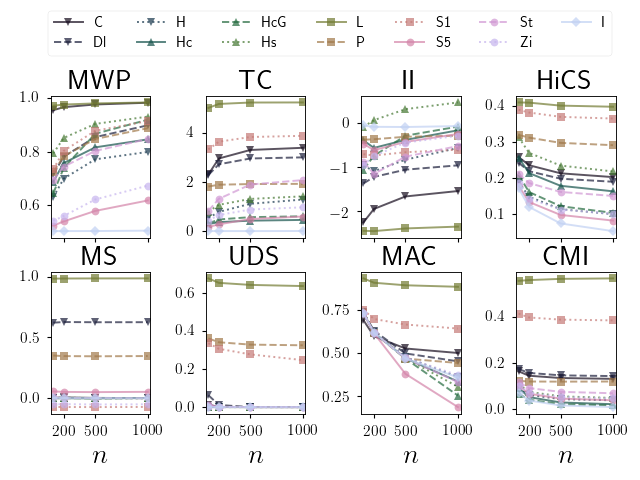

Index(['C', 'Dl', 'H', 'Hc', 'HcG', 'Hs', 'L', 'P', 'S1', 'S5', 'St', 'Zi',
       'I'],
      dtype='object', name='category')


In [68]:
from cycler import cycler


monochrome=((cycler('marker', ['v', '^', 's', 'o', "D"]) * (cycler('linestyle', ['-', '--', ':']))) + 
            cycler('color', sns.color_palette("cubehelix", 15)) )

noise = 1/30
maxn = 1000

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8,6), sharex=True)
axess = axes.reshape(-1)
for ax in axess:
    ax.set_prop_cycle(monochrome)

testlist = ["MWP", "TC", "II", "HiCS", "MS", "UDS", "MAC", "CMI"]
for i,test in enumerate(testlist):
    d = selectedData[(selectedData["testId"]==test) & (selectedData["category"])& 
                     (selectedData["noise"]==noise) &
                     (selectedData["n"]<=maxn) &
                     (selectedData["nDim"]==3)].groupby(["n", "category"])
    means = d.mean()
    means = means.reindex(
        #['C', "P", "Dl", "S1", "H", 'S5', 'Hc', 'St', 'HcG', "Zi", "Hs", "I", 'L']
        ['C', 'Dl', 'H', 'Hc', 'HcG', 'Hs', 'L', 'P', 'S1', 'S5', 'St', 'Zi', "I"], level="category")
    #errors = d.std()
    #ax = means.unstack().plot(y="avgContrast", ax=axess[i], alpha=0.7)#, yerr="stdContrast")
    #ax = means.unstack()["avgContrast"].plot(ax=axess[i], alpha=0.7)#, yerr="stdContrast")
    for x in ['C', 'Dl', 'H', 'Hc', 'HcG', 'Hs', 'L', 'P', 'S1', 'S5', 'St', 'Zi', "I"]:
        means.unstack()["avgContrast"][x].plot(ax=axess[i], alpha=0.7)
    ax = axess[i]
    ax.set_ylabel("")
    ax.set_xticks([200,  500, 1000])
    ax.set_xlim((75,1025))
    if(i > 3):
        ax.set_xlabel("$n$")
    else:
        ax.set_xlabel("")
        

    ax.set_title(r'%s'%test)
    if(i==0):
        print(means.unstack()["avgContrast"].columns)
        L=ax.legend(loc='upper center', bbox_to_anchor=(2.80, 1.65), ncol=7, fontsize=13)
        L.set_title("")
    else:
        L = ax.legend()
        L.remove()
        
plt.tight_layout()
fig.subplots_adjust(top=0.80)
plt.savefig("plots/Fig8.pdf")

In [ ]:
# note that here, UDS showed a particularly weird behavior w.r.t. L